Simulation of diffusion in 1D:
- initial conditions:
  - particles uniformly distributed in the box,
  - all particles in the same place (default: all particles at position 0),
- boundary conditions (can be chosen independently for left and right edge of the box):
  - closed (default),
  - absorbing,
  - periodic,
- in each simulation step, each particle can either stay in the same position, move by one to the left or move by one to the right (as long as it does not break the boundary conditions),
- probabilities of a particle staying in the same place, moving to the left and moving to the right can be chosen arbitrarily (default: 1/3, 1/3 1/3).


In [1]:
import numpy as np
from numpy import random as rd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [2]:
def initial(particles, box_size, condition = 0):
  bin_edges = np.arange(-box_size-0.5,box_size+1.5,dtype = float)
  n = box_size
  if(type(condition)==int): #all particles in one place
    x_init = np.zeros(2*n+1)
    x_init[n+condition] = particles
  elif(condition == 'u'): #particles uniformly distributed in the box
    a = np.random.randint(2*n+1,size = particles)
    _, x_init = np.unique(a, return_counts=True)
  return x_init,bin_edges #returns: initial numbers of particles in each position, position bin edges


In [3]:
def boundaries(box_size,left,right,evolution_steps):
  n = box_size
  l = evolution_steps[1,0] - evolution_steps[0,2]
  r = evolution_steps[2*n-1,2] - evolution_steps[2*n,0]
  if (left == 'a'): #if the particle moves to the left from the first bin, it disappears
    l -= evolution_steps[0,0]
  elif (left == 'p'): #if the particle moves to the left from the first bin, it reappears in the last bin
    l -= evolution_steps[0,0]
    r += evolution_steps[0,0]
  if (right == 'a'): #if the particle moves to the right from the last bin, it disappears
    r -= evolution_steps[2*n,2]
  elif (right == 'p'): #if the particle moves to the right from the last bin, it reappears in the first bin
    r-= evolution_steps[2*n,2]
    l+=evolution_steps[2*n,2]
  #otherwise the particle bounces off the edges of the box
  return np.array([l]),np.array([r])#returns: change in the number of particles in the first bin and in the last bin


In [27]:
def simulate(particles,box_size,steps,initial_conditions = 0,left = 'c',right = 'c',dist = [1/3.]*3,steps_per_frame = 50):
  n = box_size #the box is the interval from -n to n
  x,bin_edges = initial(particles,box_size,initial_conditions)#initial positions
  #fig,ax = plt.subplots()
  #plt.figure(1)
  plt.stairs(x,bin_edges)
  #plt.yscale('log')
  plt.ylabel("Number of particles")
  plt.xlabel("Position")
  plt.show()
  time.sleep(0.2)
  for i in range(steps):
    evolution_steps = np.array([rd.multinomial(a,dist) for a in x])#number of -1,0 and +1 steps taken by particles in each bin (multinomial distribution)
    #changes in the number of particles in the middle bins
    middle = np.add(np.add(evolution_steps[0:2*n-1,2],evolution_steps[2:2*n+1,0]),-1*np.add(evolution_steps[1:2*n,2],evolution_steps[1:2*n,0]))
    l,r = boundaries(box_size,left,right,evolution_steps)#changes in the number of particles in the first and the last bin
    changes = np.concatenate((l,middle,r),axis=0)
    x = np.add(x,changes)#new numbers of particles in each bin
    if (i%steps_per_frame == steps_per_frame-1):
      clear_output(wait=True)
      #plt.figure(1)
      plt.stairs(x,bin_edges)
      plt.title('Step '+str(i+1))
      plt.ylabel("Number of particles")
      plt.xlabel("Position")
      #plt.yscale('log')
      plt.show()
      time.sleep(0.2)

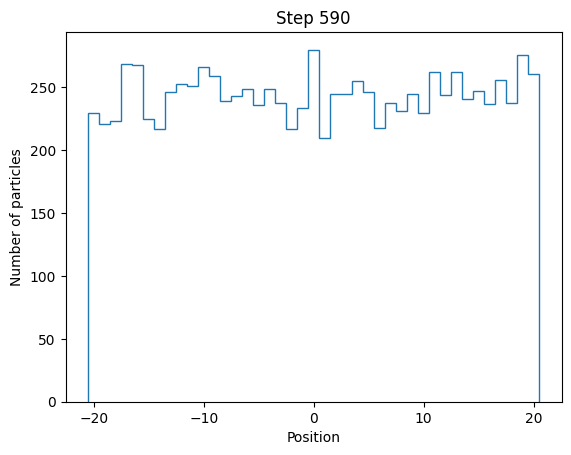

KeyboardInterrupt: ignored

In [23]:
simulate(particles = 10000, box_size = 20, steps = 800, left = 'p', right = 'p', initial_conditions = 10, dist = (1/3.,1/3.,1/3.), steps_per_frame = 10)

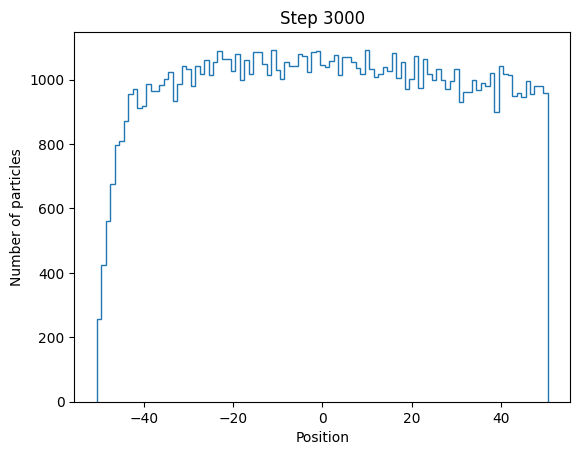

In [30]:
#change y axis to log before running!
simulate(particles = 100000, box_size = 50, steps = 3000, left = 'p', right = 'c', initial_conditions = 0, dist = (0.4,0.3,0.3), steps_per_frame = 50)